# Solve the Field Equation

In [1]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte
import scipy.constants as c

import axion_mass
from config import model
import g_star
import time_temp
import T_osc_solver
import eom_solver
import density_plot

/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in log
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d
/home/janik/Documents/bachelor/axion_mass.py:69: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(chi(T)) / f_a


CPU times: user 2.85 s, sys: 1.52 ms, total: 2.85 s
Wall time: 2.86 s
T_osc = 984112560.444


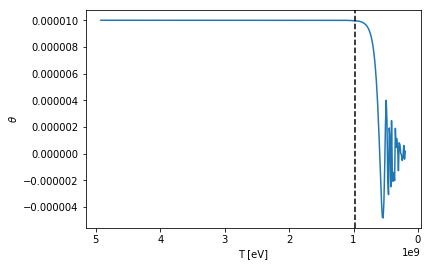

In [3]:
f_a = 1e12 * 1e9
m_a_fn = axion_mass.m_a_from_chi_general
g_model = g_star.borsamyi_table
theta_i = 1e-5
%time T, phi = eom_solver.sim_axion_field_evo_T(theta_i, f_a, m_a_fn, g_model)
plt.plot(T, phi)
plt.xlabel("T [eV]")
plt.ylabel(r"$\theta$")
T_osc = T_osc_solver.find_T_osc(f_a, m_a_fn, g_model)
plt.axvline(T_osc, color="black", linestyle="--")
print("T_osc =", T_osc)
plt.gca().invert_xaxis()

In [20]:
eom_solver = importlib.reload(eom_solver)
density_plot = importlib.reload(density_plot)

In [10]:
%time T, theta, dthetadT = eom_solver.find_axion_field_osc_vals(theta_i, f_a, m_a_fn, g_model)
%time eom_solver.compute_density_parameter_from_field(T, theta, dthetadT, f_a, m_a_fn, g_model)

CPU times: user 962 ms, sys: 4.02 ms, total: 966 ms
Wall time: 960 ms
CPU times: user 543 µs, sys: 0 ns, total: 543 µs
Wall time: 542 µs


/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in double_scalars
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d
/home/janik/Documents/bachelor/axion_mass.py:69: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(chi(T)) / f_a


0.0017395116942498497